# Température *HadCRUT* - *correction*

Nous avons décidé ici d'utiliser le package `prince` pour démonstration.

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from prince import PCA

Attention, l'URL donnée n'était pas la bonne. La nouvelle est la suivante :

- `https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0Analysis_gl.txt`

In [2]:
temp = pandas.read_table(
    "https://crudata.uea.ac.uk/cru/data/temperature/HadCRUT5.0Analysis_gl.txt", 
    sep = "\s+", 
    names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Annual"])
temp = temp.iloc[::2]
temp = temp.iloc[:-1] # suppression de la dernière ligne (i.e. 2023 non finie)
temp

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1850,-0.675,-0.333,-0.591,-0.589,-0.508,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404,-0.418
1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228,-0.233
1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229
1853,-0.233,-0.404,-0.280,-0.386,-0.268,-0.142,-0.083,-0.057,-0.250,-0.392,-0.411,-0.337,-0.270
1854,-0.381,-0.361,-0.243,-0.334,-0.291,-0.299,-0.179,-0.239,-0.217,-0.095,-0.410,-0.450,-0.292
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.711,0.796,0.790,0.822,0.713,0.738,0.733,0.735,0.676,0.869,0.745,0.824,0.763
2019,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037,0.891
2020,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.013,0.693,0.923
2021,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.867,0.907,0.854,0.751,0.762


## Description

In [3]:
temp.describe().round(2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
count,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00,173.00
mean,-0.10,-0.10,-0.12,-0.09,-0.09,-0.07,-0.04,-0.03,-0.05,-0.04,-0.08,-0.12,-0.08
std,0.42,0.43,0.44,0.40,0.37,0.35,0.34,0.35,0.35,0.37,0.40,0.41,0.37
min,-1.04,-0.84,-0.84,-0.66,-0.66,-0.64,-0.59,-0.60,-0.64,-0.68,-0.68,-0.90,-0.60
25%,-0.39,-0.41,-0.43,-0.39,-0.36,-0.31,-0.29,-0.27,-0.31,-0.33,-0.39,-0.42,-0.34
50%,-0.18,-0.22,-0.21,-0.18,-0.17,-0.15,-0.13,-0.11,-0.13,-0.10,-0.14,-0.21,-0.18
75%,0.12,0.12,0.10,0.15,0.12,0.09,0.08,0.12,0.12,0.11,0.06,0.11,0.08
max,1.09,1.22,1.18,1.06,0.91,0.86,0.86,0.95,0.87,1.01,1.01,1.04,0.93


Pas de distribution dissymétrique, mais quelques valeurs extrêmes toutefois.

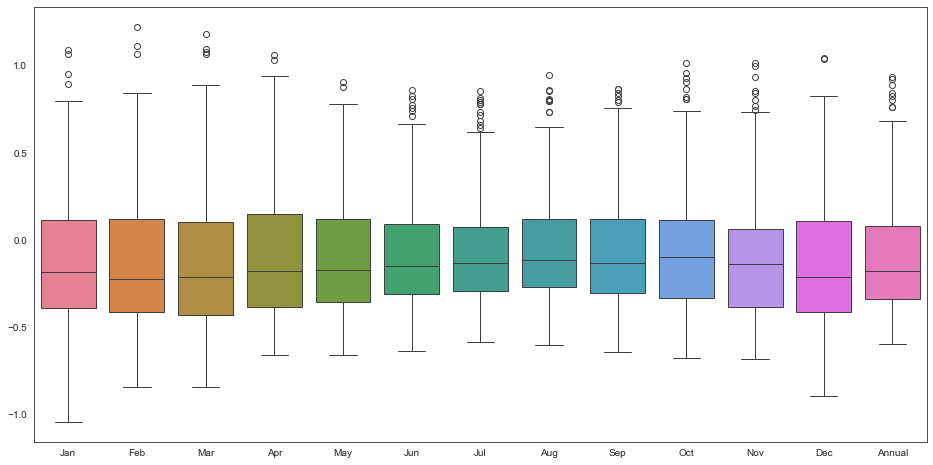

In [4]:
plt.figure(figsize = (16, 8))
seaborn.boxplot(data = temp)
plt.show()

La représentation de l'évolution des anomalies moyennes annuelles permet de voir que la température est en augmentation, particulièrement depuis le milieu des années 1970.

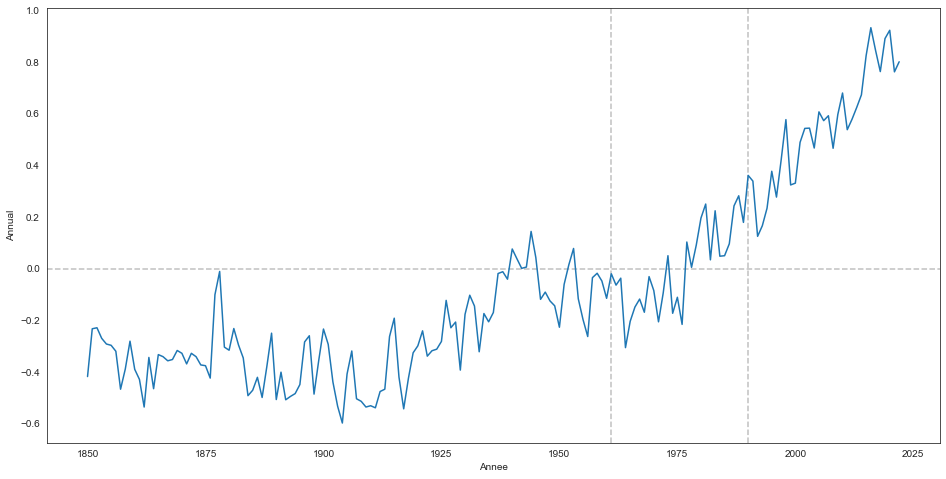

In [5]:
plt.figure(figsize = (16, 8))
plt.axhline(y = 0, linestyle = "dashed", color = "gray", alpha = .5)
plt.axvline(x = 1961, linestyle = "dashed", color = "gray", alpha = .5)
plt.axvline(x = 1990, linestyle = "dashed", color = "gray", alpha = .5)
seaborn.lineplot(x = "Annee", y = "Annual",
                 data = temp.assign(Annee = temp.index).reset_index(drop=True))
plt.show()

## Analyse

In [6]:
temp2 = temp[temp.columns[:12]]
temp2

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1850,-0.675,-0.333,-0.591,-0.589,-0.508,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404
1851,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228
1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065
1853,-0.233,-0.404,-0.280,-0.386,-0.268,-0.142,-0.083,-0.057,-0.250,-0.392,-0.411,-0.337
1854,-0.381,-0.361,-0.243,-0.334,-0.291,-0.299,-0.179,-0.239,-0.217,-0.095,-0.410,-0.450
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.711,0.796,0.790,0.822,0.713,0.738,0.733,0.735,0.676,0.869,0.745,0.824
2019,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037
2020,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.013,0.693
2021,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.867,0.907,0.854,0.751


In [7]:
pca = PCA(n_components = 12)
pca.fit(temp2)

PCA(n_components=12)

In [8]:
eig = pandas.DataFrame({
    "Dimension": ["Dim"+str(i+1) for i in range(12)],
    "Valeurs propres": pca.eigenvalues_,
    "% expliquée": pca.percentage_of_variance_ * 100,
    "% expliquée cumulée": numpy.cumsum(pca.percentage_of_variance_) * 100
})
eig.round(2)

,Dimension,Valeurs propres,% expliquée,% expliquée cumulée
0,Dim1,11.06,9218.75,9218.75
1,Dim2,0.31,257.01,9475.76
2,Dim3,0.13,111.80,9587.56
3,Dim4,0.11,94.73,9682.29
4,Dim5,0.09,75.62,9757.91
5,Dim6,0.07,58.69,9816.60
6,Dim7,0.05,43.39,9859.99
7,Dim8,0.05,37.70,9897.69
8,Dim9,0.04,32.28,9929.97
9,Dim10,0.03,26.80,9956.77


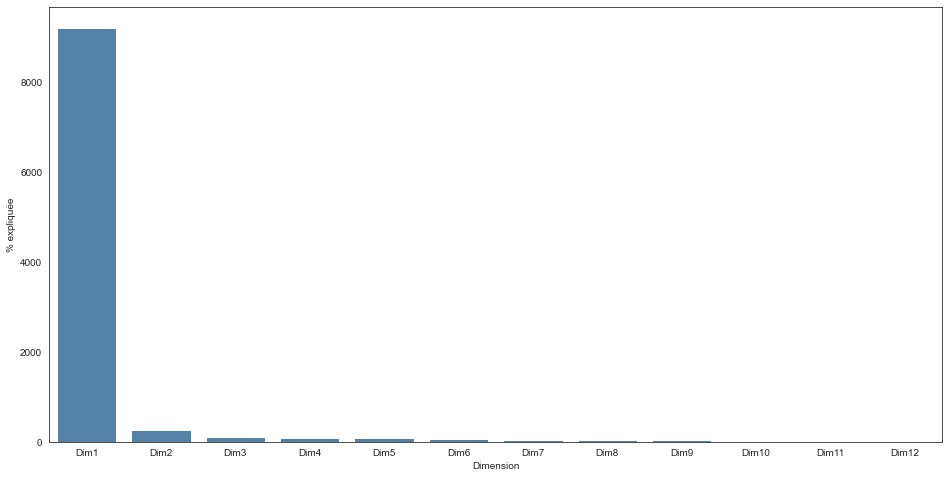

In [9]:
plt.figure(figsize = (16, 8))
seaborn.barplot(x = "Dimension", y = "% expliquée", data = eig, color = "steelblue")
plt.show()

In [10]:
pca.column_correlations.round(2) 

component,0,1,2,3,4,5,6,7,8,9,10,11
variable,,,,,,,,,,,,
Jan,0.93,-0.26,-0.15,0.15,0.02,-0.11,-0.08,0.05,0.01,-0.01,-0.01,0.01
Feb,0.94,-0.26,-0.11,0.01,0.01,0.17,0.08,-0.05,0.01,0.00,0.02,0.00
Mar,0.95,-0.15,0.06,-0.21,-0.08,0.01,-0.09,0.05,0.02,-0.03,0.06,-0.01
Apr,0.97,-0.13,0.07,-0.09,-0.04,-0.04,0.02,-0.02,-0.04,0.05,-0.12,-0.02
May,0.97,-0.06,0.08,-0.02,0.04,-0.14,0.08,-0.07,-0.05,0.02,0.08,0.03
Jun,0.97,0.02,0.11,0.02,0.12,-0.02,0.07,0.04,0.07,-0.11,-0.03,-0.04
Jul,0.97,0.06,0.13,0.06,0.09,0.05,-0.03,0.05,0.07,0.11,0.01,0.02
Aug,0.97,0.09,0.09,0.07,-0.01,0.08,-0.05,0.00,-0.10,-0.06,-0.01,0.09
Sep,0.97,0.11,0.03,0.12,-0.07,0.03,-0.04,-0.03,-0.06,0.01,0.03,-0.11


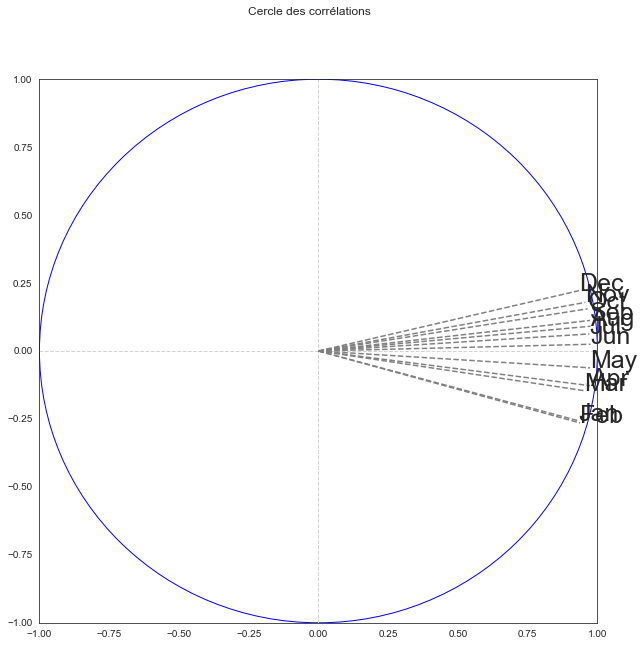

In [11]:
coord_col = pca.column_correlations

fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(12):
    xj = coord_col.iloc[j,0]
    yj = coord_col.iloc[j,1]
    axes.text(xj, yj, coord_col.index[j], size = 25)
    axes.plot([0,xj], [0,yj], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

In [12]:
pca.plot(temp2,
    x_component=0,
    y_component=1,
    show_rows=True,
    show_columns=False)

alt.LayerChart(...)

In [13]:
coord = pca.row_coordinates(temp2)
coord

component,0,1,2,3,4,5,6,7,8,9,10,11
1850,-3.021460,0.411999,0.119565,0.058827,0.396971,0.777933,0.335008,0.420584,-0.131052,0.170942,0.181739,0.231190
1851,-1.309564,0.957097,-0.170226,0.912683,0.077980,-0.320841,0.149833,0.029578,0.226209,-0.094501,0.250145,0.181062
1852,-1.259074,1.170080,0.050785,0.493323,0.906975,-0.123123,-0.145024,-0.229338,0.046217,0.049939,0.563511,-0.240811
1853,-1.692188,-0.101091,0.472899,0.196492,0.522350,0.034219,-0.338921,0.341687,-0.114936,-0.161981,0.176063,0.184747
1854,-1.904288,-0.037067,0.329189,-0.028086,-0.307753,0.010235,-0.243701,-0.248199,0.339308,0.063261,0.160288,0.039758
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,7.606109,0.222973,0.015544,-0.105103,0.097810,0.040727,-0.007438,-0.199299,0.212009,0.014017,-0.149213,0.086003
2019,8.754094,0.427307,-0.035513,-0.420313,0.028351,0.082108,-0.245694,0.049820,0.136019,0.058043,-0.063785,0.044695
2020,9.004169,-0.678229,0.004038,0.026934,-0.313211,-0.007392,0.247436,0.293121,-0.085913,0.128454,0.017713,-0.155715
2021,7.658361,0.773029,0.253261,0.312389,-0.227632,-0.140942,-0.165558,0.022980,0.043424,0.105553,-0.025272,-0.096503


In [14]:
contrib = pca.row_contributions_
contrib.round(2)

component,0,1,2,3,4,5,6,7,8,9,10,11
1850,0.00,0.00,0.00,0.00,0.01,0.05,0.01,0.02,0.00,0.01,0.01,0.01
1851,0.00,0.02,0.00,0.04,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01
1852,0.00,0.03,0.00,0.01,0.05,0.00,0.00,0.01,0.00,0.00,0.07,0.01
1853,0.00,0.00,0.01,0.00,0.02,0.00,0.01,0.01,0.00,0.00,0.01,0.01
1854,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.01,0.02,0.00,0.01,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
2018,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00
2019,0.04,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
2020,0.04,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01
2021,0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


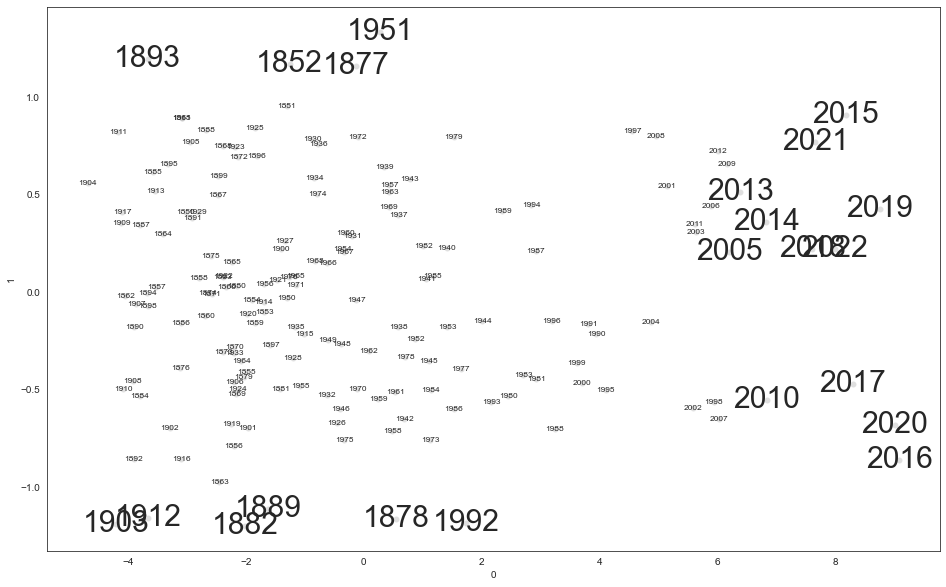

In [15]:
plt.figure(figsize = (16, 10))
seaborn.scatterplot(x = 0, y = 1, data = coord, color = "gray", alpha = .25)
for i in range(coord.shape[0]):
    taille = "small"
    if (contrib.iloc[i,0] > .02):
        taille = 30
    if (contrib.iloc[i,1] > .02):
        taille = 30
    plt.text(coord.iloc[i][0], coord.iloc[i][1], coord.index[i], 
             fontsize = taille, ha = "center", va = "center")

In [16]:
pandas.DataFrame(temp.mean()).transpose().round(3).rename(index = {0: "Moyenne"})

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Moyenne,-0.104,-0.101,-0.122,-0.09,-0.095,-0.068,-0.045,-0.029,-0.047,-0.045,-0.083,-0.118,-0.079


In [17]:
# Années avec un début d'année chaud et une fin d'année froide
temp.filter(items = [1852, 1877, 1893, 1951], axis = 0)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1852,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229
1877,-0.411,-0.209,-0.091,-0.346,-0.411,-0.138,-0.016,0.211,0.108,0.113,0.034,-0.056,-0.101
1893,-1.045,-0.845,-0.427,-0.515,-0.572,-0.442,-0.244,-0.287,-0.365,-0.304,-0.405,-0.485,-0.495
1951,-0.360,-0.509,-0.262,-0.108,0.032,0.060,0.039,0.121,0.132,0.124,-0.072,0.069,-0.061


In [18]:
# Années avec un début d'année froid et une fin d'année chaude
temp.filter(items = [1878, 1882, 1903, 1912, 1992], axis = 0)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
1878,-0.070,0.229,0.361,0.189,-0.122,0.010,-0.077,-0.047,0.021,-0.165,-0.143,-0.323,-0.011
1882,-0.025,-0.117,-0.177,-0.315,-0.326,-0.392,-0.341,-0.245,-0.150,-0.399,-0.404,-0.655,-0.296
1903,-0.434,-0.240,-0.398,-0.588,-0.516,-0.548,-0.505,-0.601,-0.560,-0.665,-0.630,-0.714,-0.533
1912,-0.329,-0.315,-0.554,-0.338,-0.335,-0.285,-0.507,-0.572,-0.644,-0.679,-0.558,-0.591,-0.476
1992,0.363,0.348,0.309,0.162,0.168,0.156,0.005,0.038,-0.090,-0.023,-0.037,0.099,0.125


In [19]:
# Années (beaucoup) plus chaudes que la moyenne
temp.filter(items = [i for i in range(2015, 2022)], axis = 0)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
2015,0.740,0.782,0.795,0.701,0.731,0.760,0.715,0.799,0.826,1.015,0.996,1.042,0.825
2016,1.088,1.224,1.182,1.030,0.880,0.777,0.778,0.949,0.846,0.819,0.844,0.779,0.933
2017,0.952,1.067,1.065,0.846,0.780,0.658,0.805,0.811,0.729,0.809,0.806,0.815,0.845
2018,0.711,0.796,0.790,0.822,0.713,0.738,0.733,0.735,0.676,0.869,0.745,0.824,0.763
2019,0.800,0.844,1.076,0.939,0.778,0.809,0.857,0.858,0.803,0.956,0.937,1.037,0.891
2020,1.069,1.113,1.094,1.063,0.908,0.825,0.816,0.801,0.867,0.811,1.013,0.693,0.923
2021,0.701,0.565,0.726,0.760,0.706,0.713,0.792,0.799,0.867,0.907,0.854,0.751,0.762
